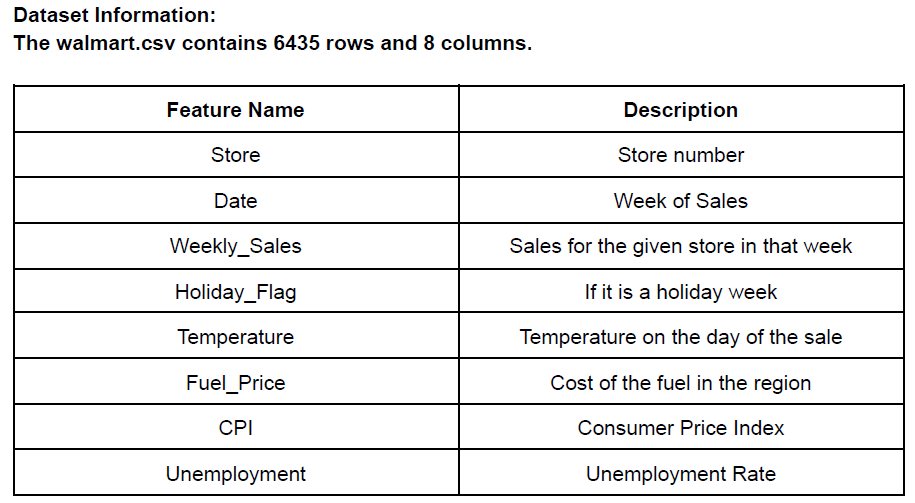

# Problem Statement
1. You are provided with the weekly sales data for their various outlets. Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:

a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?

b. If the weekly sales show a seasonal trend, when and what could be the reason?

c. Does temperature affect the weekly sales in any manner?

d. How is the Consumer Price index affecting the weekly sales of various stores?

e. Top performing stores according to the historical data.

f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.

2. Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks.

In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import and execute method for suppressing warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [311]:
df=pd.read_csv('/content/Walmart DataSet.csv')

In [312]:
df.shape

(6435, 8)

In [313]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [314]:
df.dtypes

,0
Store,int64
Date,object
Weekly_Sales,float64
Holiday_Flag,int64
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64


In [315]:
df['Date']=pd.to_datetime(df['Date'],format="%d-%m-%Y")

In [316]:
df.dtypes

,0
Store,int64
Date,datetime64[ns]
Weekly_Sales,float64
Holiday_Flag,int64
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64


In [317]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [318]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

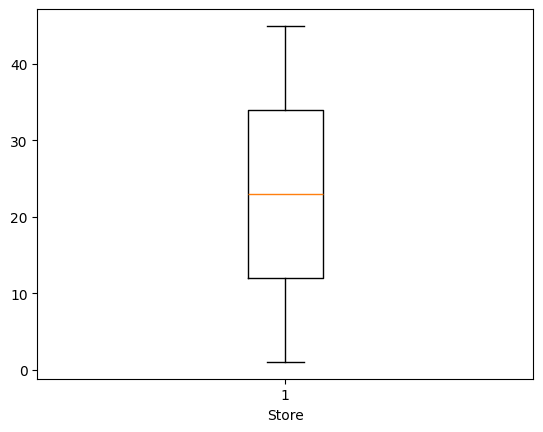

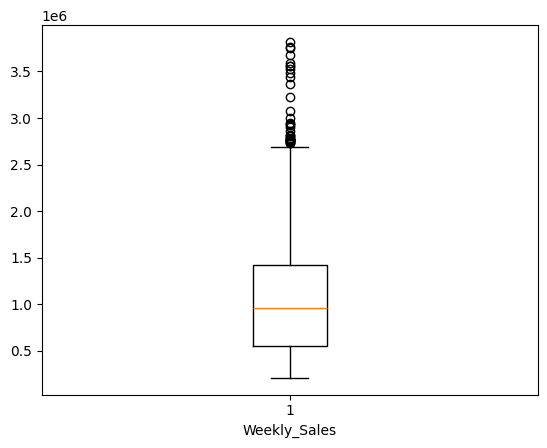

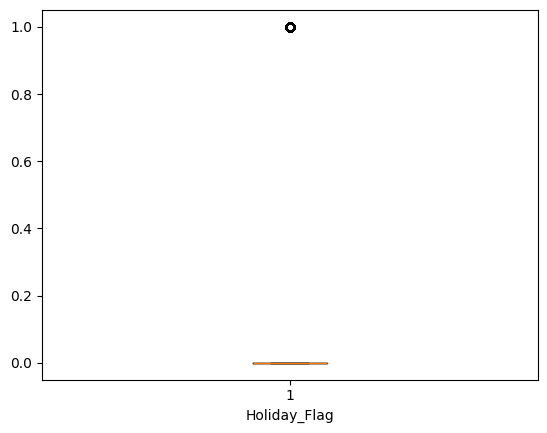

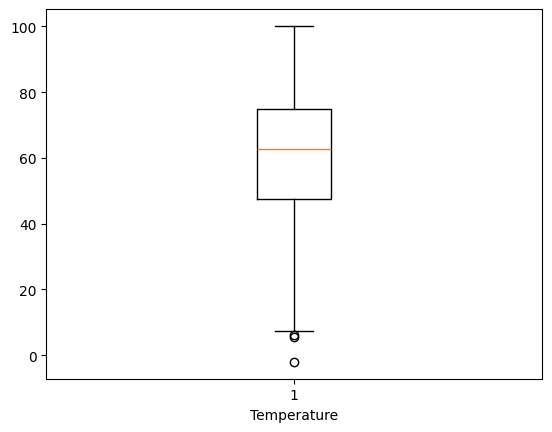

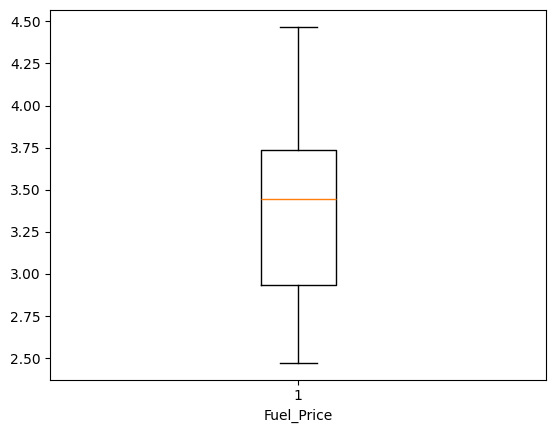

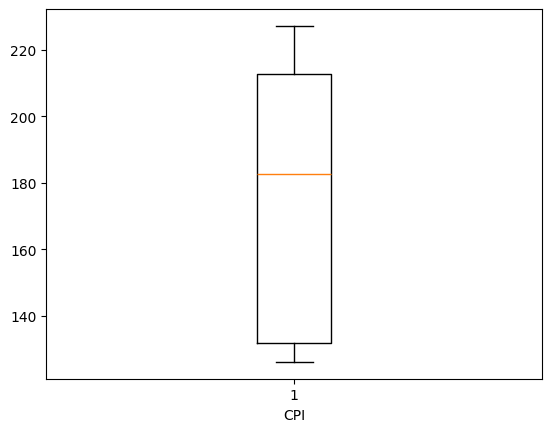

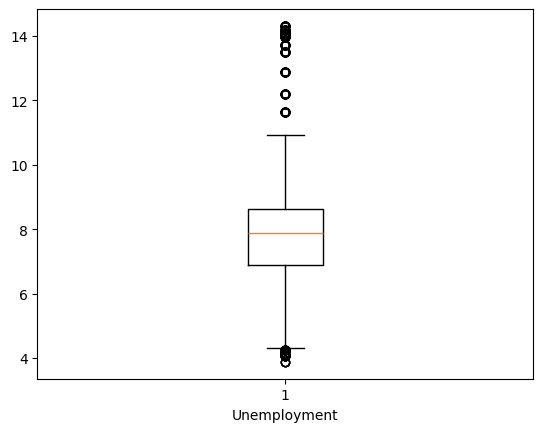

In [319]:
for i in df.columns:
  if (df[i].dtypes=='float64' or df[i].dtypes=='int64'):
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()


In this dataset we do not do anything with otliers. The columns Weekly_sales,Temperature and Unemployment contains outliers.
These are external factors that cause weekly sales in each store. These values are important for analysis.

#a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [320]:
#Correlation Analysis (Overall Trend)
correlation=df['Weekly_Sales'].corr(df['Unemployment'])
print("Overall correlation:", correlation)

Overall correlation: -0.10617608965795429


In [321]:
store_corr=df.groupby('Store').apply(lambda g: g['Weekly_Sales'].corr(df['Unemployment']))
store_corr = store_corr.dropna().sort_values()

print("Top 5 most negatively affected stores:")
print(store_corr.head(5))

Top 5 most negatively affected stores:
Store
38   -0.785290
44   -0.780076
39   -0.384681
42   -0.356355
41   -0.350630
dtype: float64


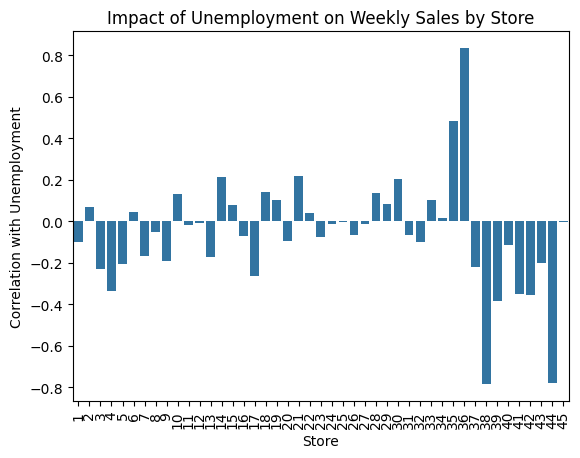

In [322]:
#Heatmap of correlation per store
sns.barplot(x=store_corr.index, y=store_corr.values)
plt.xticks(rotation=90)
plt.ylabel('Correlation with Unemployment')
plt.title('Impact of Unemployment on Weekly Sales by Store')
plt.show()

There is a weak negative relationship between weekly sales and unemployment.
As unemployment rises, weekly sales tend to slightly decrease, but the effect is not strong overall.

#b. If the weekly sales show a seasonal trend, when and what could be the reason?

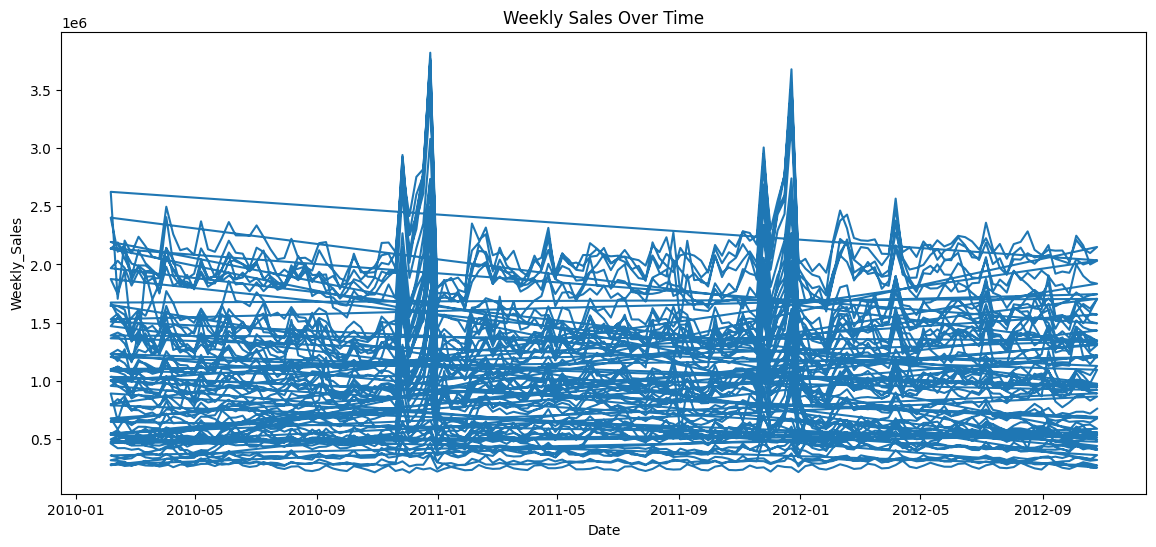

In [323]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'],df['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.title('Weekly Sales Over Time')
plt.show()

##Store wise weekly sales seasonal trend

In [324]:
df_1=df[df['Store']==1]

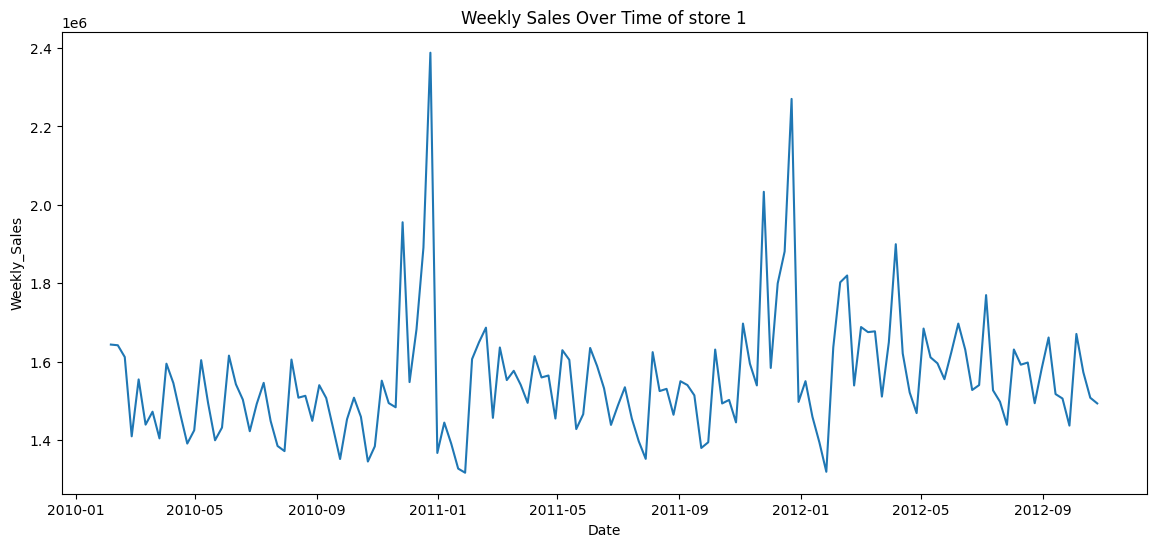

In [325]:
plt.figure(figsize=(14,6))
plt.plot(df_1['Date'],df_1['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.title('Weekly Sales Over Time of store 1')
plt.show()

In [326]:
df_21=df[df['Store']==21]

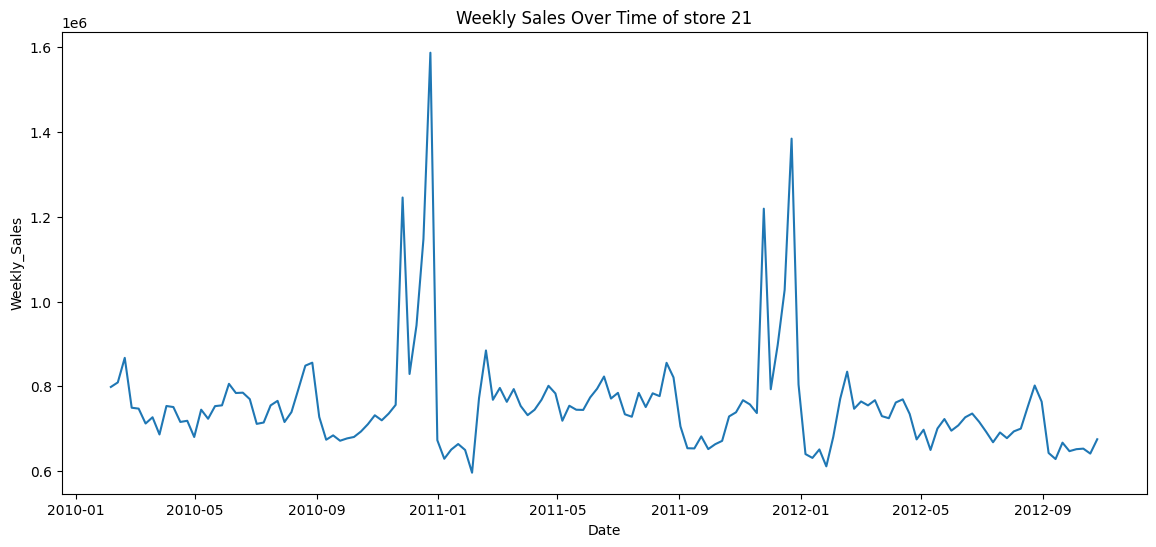

In [327]:
plt.figure(figsize=(14,6))
plt.plot(df_21['Date'],df_21['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.title('Weekly Sales Over Time of store 21')
plt.show()

There are sharp, recurring spikes:
* One at the end of 2010
* Another at the end of 2011

These sharp peaks at the same time each year (around November–December) are classic indicators of seasonality — specifically:

🎄 Holiday Season Effect

* The spikes align with Black Friday, Christmas, and holiday shopping.
* This is a common retail trend, where sales jump sharply during this season.

#c. Does temperature affect the weekly sales in any manner?

In [328]:
temp_corr=df['Weekly_Sales'].corr(df['Temperature'])
print("Correlation between Temperature and Weekly Sales:", correlation)

Correlation between Temperature and Weekly Sales: -0.10617608965795429


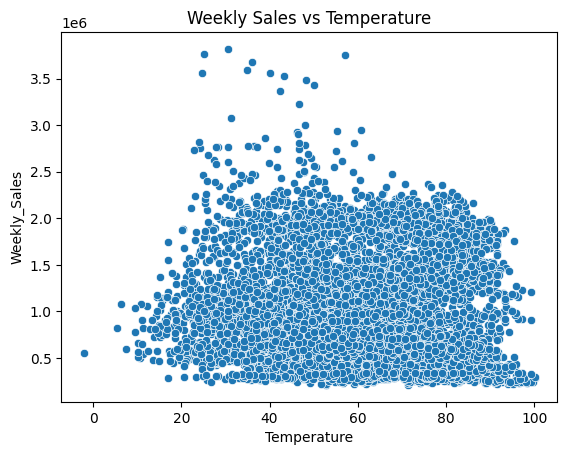

In [329]:
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title("Weekly Sales vs Temperature")
plt.show()

The relationship is weakly negative.

As temperature increases, weekly sales slightly decrease — but the effect is not strong.

This suggests that overall, temperature does not significantly influence weekly sales across all stores.

#d. How is the Consumer Price index affecting the weekly sales of various stores?

In [330]:
store_cpi_corr=df.groupby('Store').apply(lambda g:g['Weekly_Sales'].corr(g['CPI']))
store_cpi_corr = store_cpi_corr.dropna().sort_values()

In [331]:
print("Stores most negatively affected by CPI:")
print(store_cpi_corr.head())

print("\nStores positively correlated with CPI:")
print(store_cpi_corr.tail())

Stores most negatively affected by CPI:
Store
36   -0.915095
35   -0.424107
14   -0.419755
30   -0.298188
43   -0.285686
dtype: float64

Stores positively correlated with CPI:
Store
42    0.360859
41    0.392293
39    0.428043
44    0.740150
38    0.812837
dtype: float64


CPI does not affect all stores equally.

Stores like 36, 35, 14 are highly sensitive to inflation → might need price promotions or subsidies.

Stores like 38, 44 show resilience or even benefit from inflationary periods → opportunities to increase margin or product offerings.

#e. Top performing stores according to the historical data.

In [332]:
top_performing_stores=df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print("Top 5 Stores by Total Sales:")
print(top_performing_stores.head())

Top 5 Stores by Total Sales:
Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


#f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [333]:
worst_performing_stores=df.groupby('Store')['Weekly_Sales'].sum().sort_values()
print("The worst performing store:" ,worst_performing_stores.head(1).values)

The worst performing store: [37160221.96]


In [334]:
highest_sales=top_performing_stores.head(1).values
lowest_sales=worst_performing_stores.head(1).values
diff=highest_sales-lowest_sales
print('The difference between the highest and lowest performing stores',diff)


The difference between the highest and lowest performing stores [2.6423757e+08]


In [335]:
percent_diff = (diff / highest_sales) * 100
print(f"Percentage Difference: {percent_diff.item():.2f}%")

Percentage Difference: 87.67%


This is a very large performance gap, indicating that:

Certain stores are dramatically outperforming others

#Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [336]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [337]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

##Let's do the forecast the sales for store '4' for the next 12 weeks.

In [338]:
df.set_index('Date',inplace=True)
a=int(input("Enter the store id:"))
store=df[df['Store']==a]
sales=pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales

Enter the store id:4


,Weekly_Sales
Date,
2010-02-05,2135143.87
2010-02-12,2188307.39
2010-02-19,2049860.26
2010-02-26,1925728.84
2010-03-05,1971057.44
...,...
2012-09-28,2027620.23
2012-10-05,2209835.43
2012-10-12,2133026.07


In [339]:
sales.dtypes

,0
Weekly_Sales,float64


In [340]:
#remove date from index to change its dtype because it clearly isnt acceptable.
sales.reset_index(inplace = True)

In [341]:
#converting 'date' column to a datetime type
sales['Date'] = pd.to_datetime(sales['Date'])

In [342]:
sales.dtypes

,0
Date,datetime64[ns]
Weekly_Sales,float64


In [343]:
# resetting date back to the index
sales.set_index('Date',inplace = True)

In [344]:
sales.head()

,Weekly_Sales
Date,
2010-02-05,2135143.87
2010-02-12,2188307.39
2010-02-19,2049860.26
2010-02-26,1925728.84
2010-03-05,1971057.44


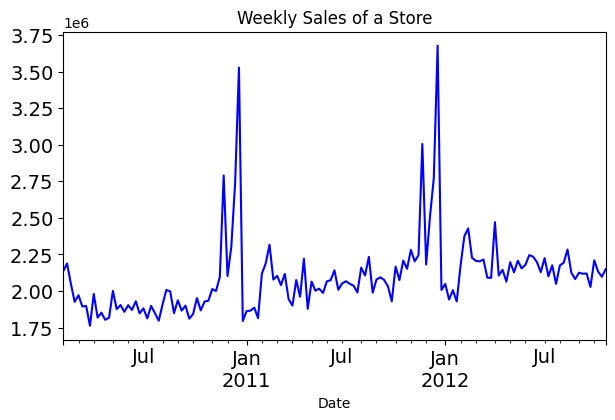

In [345]:
sales.Weekly_Sales.plot(figsize=(7,4), title= 'Weekly Sales of a Store', fontsize=14, color = 'blue')
plt.show()

<Figure size 640x480 with 0 Axes>

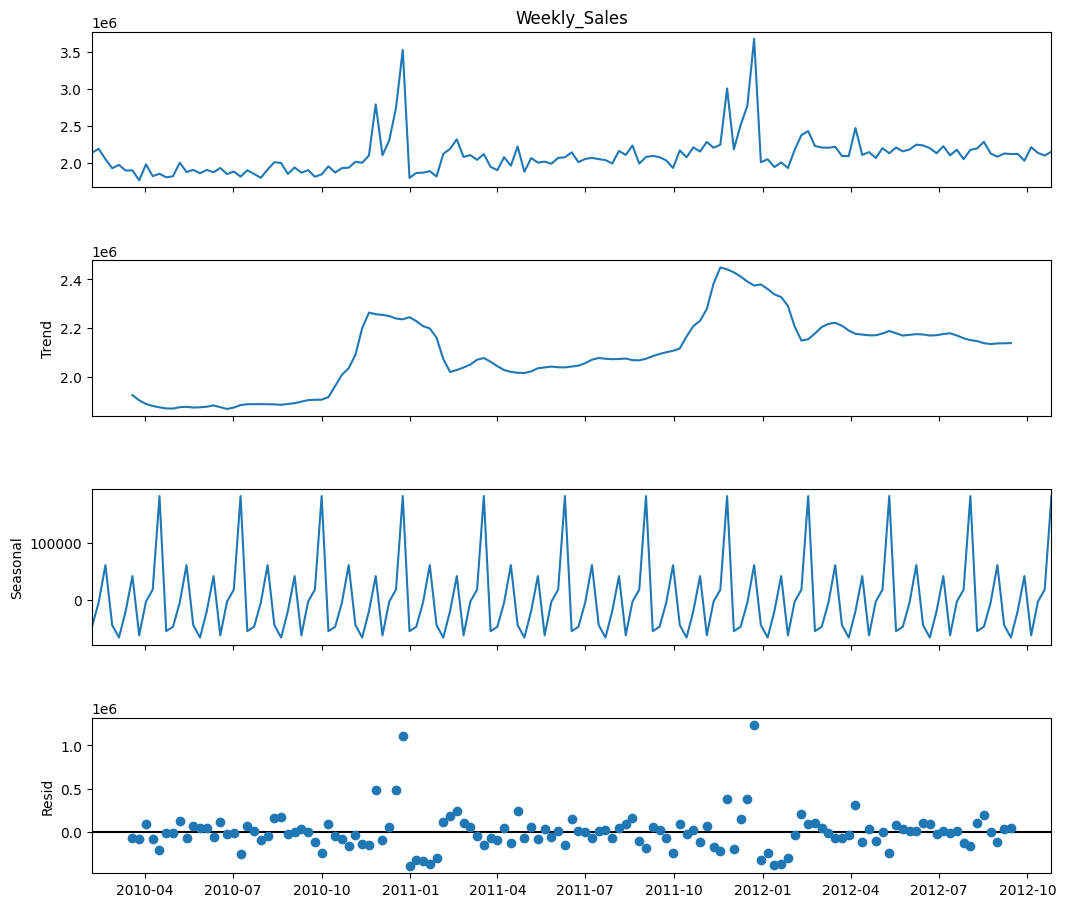

In [346]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales.Weekly_Sales, period=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

In [347]:
y1=sales.Weekly_Sales
y1

,Weekly_Sales
Date,
2010-02-05,2135143.87
2010-02-12,2188307.39
2010-02-19,2049860.26
2010-02-26,1925728.84
2010-03-05,1971057.44
...,...
2012-09-28,2027620.23
2012-10-05,2209835.43
2012-10-12,2133026.07


In [348]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y1)
print(result[1])

0.04779866223669836


Here the p-value is less than 0.05.Therefore our Time Series data for store 4 is Stationary

In [349]:
# Import 'plot_acf' from 'statsmodels' to compute and visualize the autocorrelation function (ACF) for the time series
from statsmodels.graphics.tsaplots import plot_acf

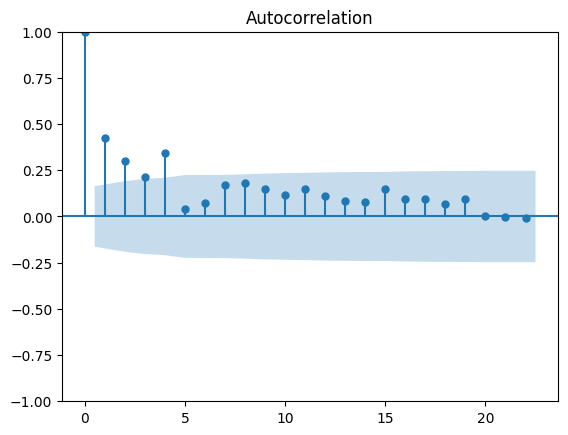

In [350]:
plot_acf(y1);

In [351]:
# Import 'plot_pacf' from 'statsmodels' to compute and visualize the partial autocorrelation function (ACF) for the time series

from statsmodels.graphics.tsaplots import plot_pacf

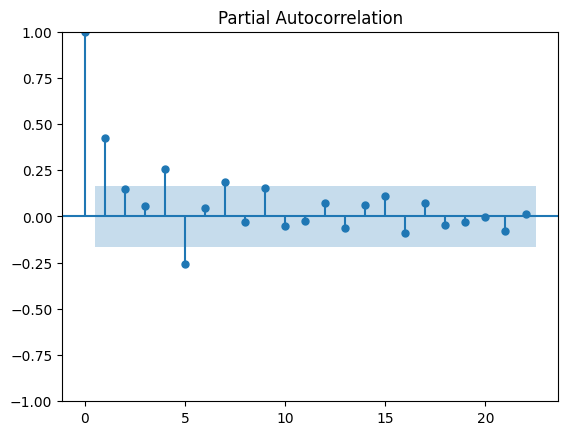

In [352]:
plot_pacf(y1);

In [353]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 5)

import itertools

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [354]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7613      0.544     -3.237      0.001      -2.828      -0.695
ar.L2         -1.3033      0.589     -2.214      0.027      -2.457      -0.150
ar.L3         -0.5981      0.256     -2.333      0.020      -1.101      -0.096
ar.L4         -0.1882      0.091     -2.061      0.039      -0.367      -0.009
ma.L1         -1.3743      0.494     -2.780      0.005      -2.343      -0.405
ma.L2         -0.2299      1.063     -0.216      0.829      -2.313       1.853
ma.L3          0.6085      0.593      1.026      0.305      -0.554       1.771
ar.S.L52      -0.0678      0.048     -1.407      0.159      -0.162       0.027
sigma2      1.622e+10   5.34e-11   3.04e+20      0.000    1.62e+10    1.62e+10


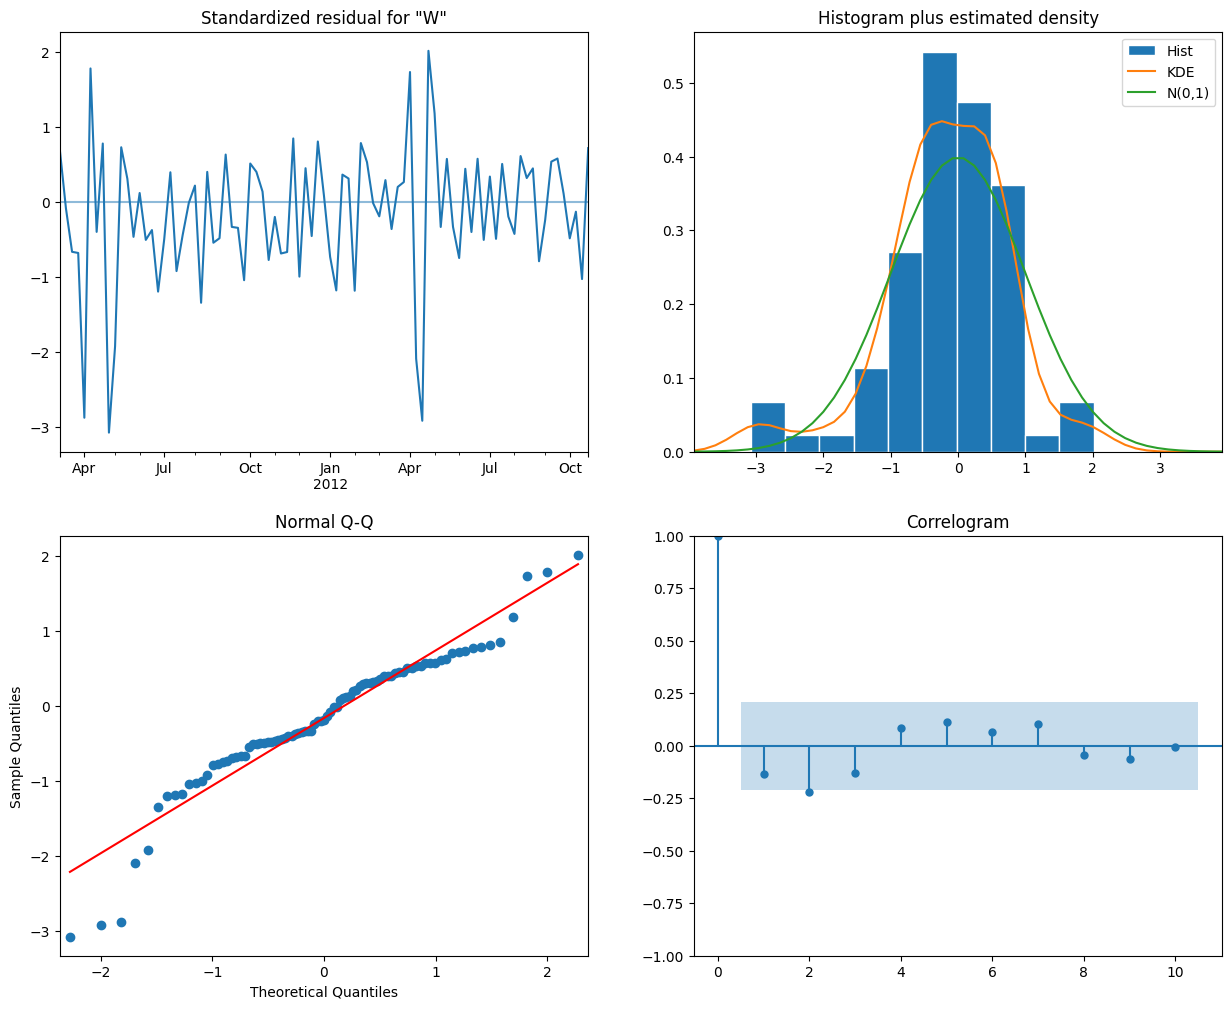

In [355]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [356]:
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

In [357]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-07-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4738798193.16


In [358]:
# dynamic forecasting, where predictions from previous time steps are used as inputs for forecasting future values.
# Unlike dynamic=False, which uses actual historical values, this simulates a real-world rolling forecast.

pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [359]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
print(y_forecasted)

2012-07-27    2.073661e+06
2012-08-03    2.251300e+06
2012-08-10    2.200027e+06
2012-08-17    2.297756e+06
2012-08-24    2.065731e+06
2012-08-31    2.121536e+06
2012-09-07    2.133884e+06
2012-09-14    2.085429e+06
2012-09-21    2.029096e+06
2012-09-28    1.904787e+06
2012-10-05    2.110902e+06
2012-10-12    1.988361e+06
2012-10-19    2.083072e+06
2012-10-26    1.997021e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [360]:
y_truth = y1['2012-7-27':]

print(y_truth)

Date
2012-07-27    2048613.65
2012-08-03    2174514.13
2012-08-10    2193367.69
2012-08-17    2283540.30
2012-08-24    2125241.68
2012-08-31    2081181.35
2012-09-07    2125104.72
2012-09-14    2117854.60
2012-09-21    2119438.53
2012-09-28    2027620.23
2012-10-05    2209835.43
2012-10-12    2133026.07
2012-10-19    2097266.85
2012-10-26    2149594.46
Name: Weekly_Sales, dtype: float64


In [361]:
# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 80406.99


In [362]:
Residual= y_forecasted - y_truth
print("Residual for Store1",np.abs(Residual).sum())

Residual for Store1 887319.8345650816


In [363]:
# Get forecast 12 weeks ahead in future
pred_uc = results.get_forecast(steps=12)

print(pred_uc)

In [364]:
print(pred_uc.predicted_mean)

2012-11-02    2.153561e+06
2012-11-09    2.086906e+06
2012-11-16    2.063313e+06
2012-11-23    2.783612e+06
2012-11-30    1.922181e+06
2012-12-07    2.174371e+06
2012-12-14    2.407419e+06
2012-12-21    3.224785e+06
2012-12-28    1.499327e+06
2013-01-04    1.458406e+06
2013-01-11    1.291984e+06
2013-01-18    1.266391e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [365]:
print(pred_uc.conf_int())

            lower Weekly_Sales  upper Weekly_Sales
2012-11-02        1.902345e+06        2.404778e+06
2012-11-09        1.752779e+06        2.421034e+06
2012-11-16        1.565248e+06        2.561378e+06
2012-11-23        2.125308e+06        3.441917e+06
2012-11-30        1.066894e+06        2.777467e+06
2012-12-07        1.106444e+06        3.242297e+06
2012-12-14        1.111330e+06        3.703508e+06
2012-12-21        1.671850e+06        4.777720e+06
2012-12-28       -3.203521e+05        3.319006e+06
2013-01-04       -6.566424e+05        3.573455e+06
2013-01-11       -1.131377e+06        3.715345e+06
2013-01-18       -1.491047e+06        4.023828e+06


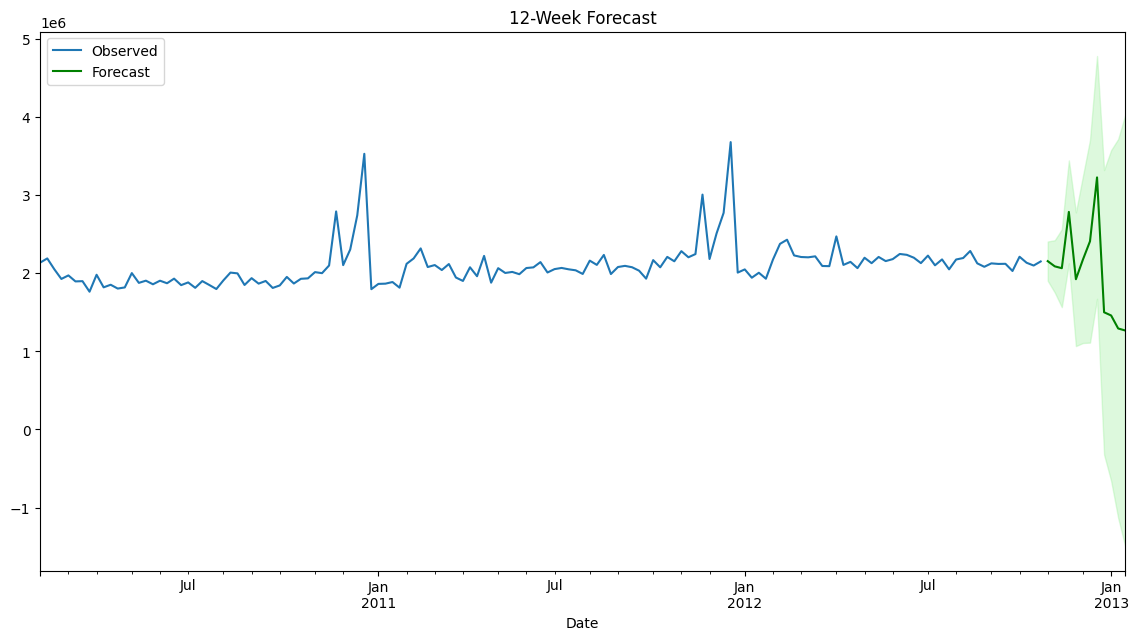

In [366]:
# Plot observed data
y1.plot(label='Observed', figsize=(14, 7))

# Plot forecasted values
pred_uc.predicted_mean.plot(label='Forecast', color='green')

# Plot confidence intervals
ci = pred_uc.conf_int()
plt.fill_between(ci.index,
                 ci.iloc[:, 0],
                 ci.iloc[:, 1], color='lightgreen', alpha=0.3)

plt.legend()
plt.title("12-Week Forecast")
plt.show()


##Now let's do the forecast for each store

In [368]:
def forecast_for_store(store_id):
      # Filter data for the given store
      store = df[df['Store'] == store_id]

      # Group by date and sum weekly sales
      sales=pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
      sales.reset_index(inplace = True)

      # Ensure 'Date' is datetime
      sales['Date'] = pd.to_datetime(sales['Date'])

      # Set 'Date' as index
      sales.set_index('Date',inplace = True)

      # Define target variable
      y1=sales.Weekly_Sales

      # Check stationarity
      from statsmodels.tsa.stattools import adfuller
      result = adfuller(y1)

      # If stationary (p < 0.05), proceed to fit SARIMA
      if result[1]<0.05:
          import statsmodels.api as sm

          # Fit SARIMA model
          mod = sm.tsa.statespace.SARIMAX(y1,
                                          order=(4, 4, 3),
                                          seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                          enforce_invertibility=False)

          results = mod.fit()

          # Forecast next 12 weeks
          pred_uc = results.get_forecast(steps=12)

          # Print forecasted weekly sales
          print("\n Forecasted Sales for Next 12 Weeks:")
          print(pred_uc.predicted_mean)

      else:
          print(" Time series is not stationary. Consider differencing or transformation.")


In [371]:
store_id = int(input("Enter the store id from 1 to 45: "))
forecast_for_store(store_id)


Enter the store id from 1 to 45: 34

 Forecasted Sales for Next 12 Weeks:
2012-11-02    9.828908e+05
2012-11-09    9.608380e+05
2012-11-16    9.076546e+05
2012-11-23    1.280257e+06
2012-11-30    9.085160e+05
2012-12-07    9.818081e+05
2012-12-14    1.028468e+06
2012-12-21    1.444430e+06
2012-12-28    7.828621e+05
2013-01-04    7.434833e+05
2013-01-11    6.743123e+05
2013-01-18    6.379951e+05
Freq: W-FRI, Name: predicted_mean, dtype: float64
